In [56]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
data = pd.read_csv('Time_Mesure.csv')
n = len(data['File Name'])
rang = list(range(n))
tim = data['Time']

full_size = data['Shape']
full_size = [x[1:len(x)-1] for x in full_size]
full_size = [tuple(map(int, x.split(','))) for x in full_size]
cols_size = [x[1] for x in full_size]
rows_size = [x[0] for x in full_size]
full_size = [x[0]*x[1] for x in full_size]

rmse = data['RMSE']
psnr = data['PSNR']
ssim = data['SSIM']

## Time Messure of EMD-2D: 

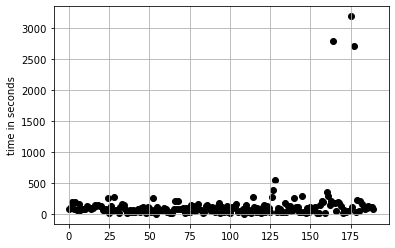

In [68]:
plt.grid()
plt.ylabel('time in seconds')
plt.scatter(rang, tim, c='black')

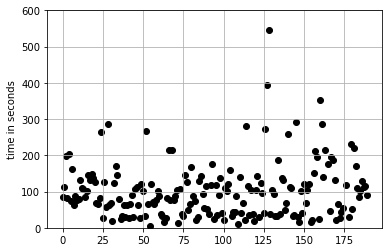

In [67]:
plt.ylim(0, 600)
plt.grid()
plt.ylabel('time in seconds')
plt.scatter(rang, tim, cmap=cm.binary, c='black')

(array([59., 70., 35., 12.,  8.,  1.,  1.,  0.,  0.,  1.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

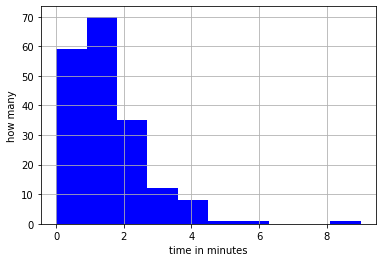

In [113]:
tims = np.zeros(10)
k = 60
for i in range(10):
    p1 = tim <= k
    p2 = tim > k-60
    tims[i] = (p1 & p2).sum()
    k+=60
plt.grid()
plt.xlabel('time in minutes')
plt.ylabel('how many')
plt.hist(list(range(10)), cumulative = False, color='b', weights = tims)

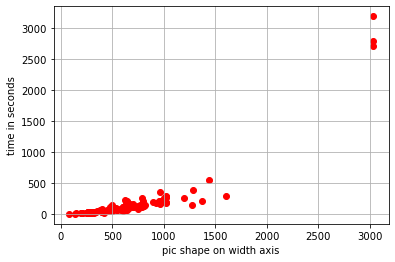

In [62]:
plt.grid()
plt.ylabel('time in seconds')
plt.xlabel('pic shape on width axis')
plt.scatter(cols_size, tim, cmap=cm.binary, c='r')

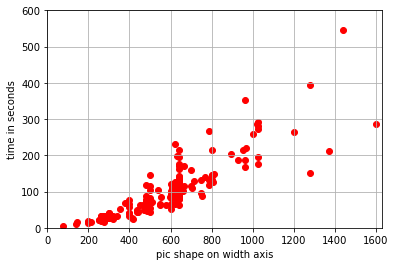

In [66]:
plt.grid()
plt.ylim(0, 600)
plt.xlim(0, 1630)
plt.ylabel('time in seconds')
plt.xlabel('pic shape on width axis')
plt.scatter(cols_size, tim, cmap=cm.binary, c='r')

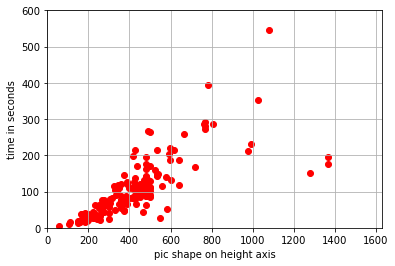

In [74]:
plt.grid()
plt.ylim(0, 600)
plt.xlim(0, 1630)
plt.ylabel('time in seconds')
plt.xlabel('pic shape on height axis')
plt.scatter(rows_size, tim, cmap=cm.binary, c='r')

# Correlation Matrix:

In [71]:
data['rows'] = rows_size
data['cols'] = cols_size
data.corr()

,No IMFs,Time,RMSE,PSNR,SSIM,rows,cols
No IMFs,1.000000,0.583217,0.042023,-0.106361,-0.186227,0.668420,0.771837
Time,0.583217,1.000000,0.061232,-0.029921,-0.118396,0.953648,0.873006
RMSE,0.042023,0.061232,1.000000,0.025853,-0.090340,0.086768,0.093097
PSNR,-0.106361,-0.029921,0.025853,1.000000,0.705999,-0.050330,-0.042005
SSIM,-0.186227,-0.118396,-0.090340,0.705999,1.000000,-0.135681,-0.138360
rows,0.668420,0.953648,0.086768,-0.050330,-0.135681,1.000000,0.929661
cols,0.771837,0.873006,0.093097,-0.042005,-0.138360,0.929661,1.000000


# RMSE of EMD-2D:

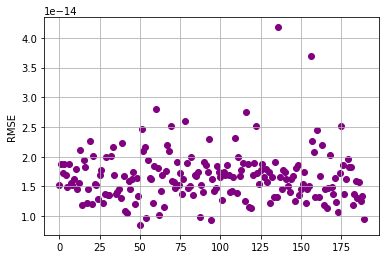

In [117]:
plt.grid()
plt.ylabel('RMSE')
plt.scatter(rang, rmse, c='purple')

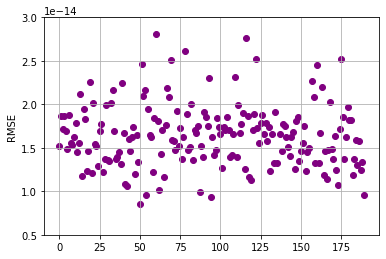

In [131]:
plt.grid()
plt.ylabel('RMSE')
plt.ylim(0.5*10**-14,3*10**-14)
plt.scatter(rang, rmse, c='purple')

# PSNR of EMD-2D:

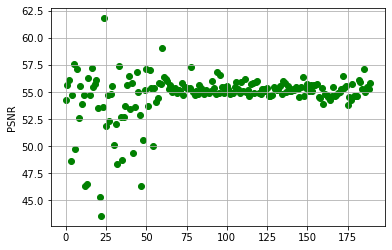

In [118]:
plt.grid()
plt.ylabel('PSNR')
plt.scatter(rang, psnr, c='g')

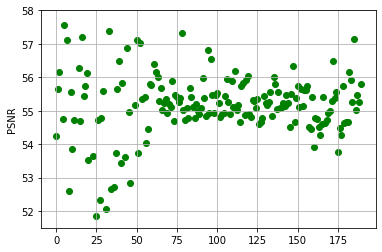

In [127]:
plt.grid()
plt.ylabel('PSNR')
plt.ylim(51.5, 58)
plt.scatter(rang, psnr, c='g')

# SSIM of EMD-2D:

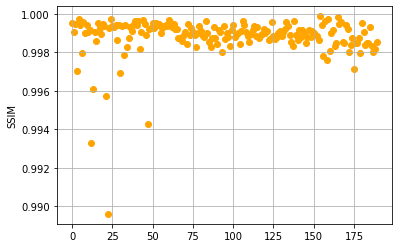

In [119]:
plt.grid()
plt.ylabel('SSIM')
plt.scatter(rang, ssim, c='orange')

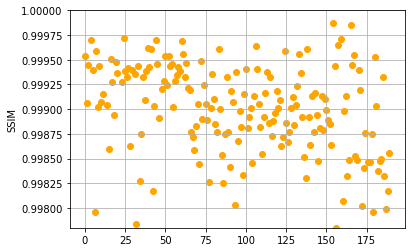

In [128]:
plt.grid()
plt.ylabel('SSIM')
plt.ylim(0.9978)
plt.scatter(rang, ssim, c='orange')